In [11]:
# Fonctions utils 
# Standard Library Imports
import os
import pickle
import re
import warnings

# Data Handling and Analysis
import pandas as pd
import numpy as np
import missingno as msno

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ax
import sweetviz as sv
# Scikit-learn for Preprocessing and Modeling
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Advanced Machine Learning Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Imbalanced-learn for Resampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline

# Importations des Librairies de Base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re
import warnings

# Configurations
warnings.filterwarnings('ignore')

# Importations Scikit-learn pour le Prétraitement et la Modélisation
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Importations pour les Modèles d'Apprentissage Automatique Avancés
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Importations Imbalanced-learn pour le Rééchantillonnage
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline

# Importations pour le Suivi des Expériences
import mlflow

# Experiment Tracking
import mlflow

# Suppress Warnings Globally
warnings.filterwarnings('ignore')
from credit_card_default_utils import *
from fonction import *
from fontTools import *



c:\Users\ibuco\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [82]:
df_train = pd.read_csv("data/application_train.csv")
df_test = pd.read_csv("data/application_test.csv")

In [21]:
df = pd.read_csv("df_cleaned.csv")

df.head()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0.083037,0.262949,0.139376,0.0149,2.0,1,1.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0.311267,0.622246,0.535276,0.0714,0.0,1,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0.505998,0.555912,0.729567,0.0688,0.0,0,0.0,1.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0.505998,0.650442,0.535276,0.0688,0.0,1,1.0,0.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,1,1,0.505998,0.322738,0.535276,0.0688,0.0,0,0.0,1.0


In [22]:
df.shape

(307511, 37)

In [23]:
df_final = pd.read_csv("df_final.csv")
df_final.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0.083037,0.262949,0.139376,0.0149,2.0,1,1.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0.311267,0.622246,0.535276,0.0714,0.0,1,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0.505998,0.555912,0.729567,0.0688,0.0,0,0.0,1.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0.505998,0.650442,0.535276,0.0688,0.0,1,1.0,0.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,1,1,0.505998,0.322738,0.535276,0.0688,0.0,0,0.0,1.0


In [24]:
df_final["CODE_GENDER"].fillna(0, inplace=True)

In [25]:
df_final.to_csv("df_cleaned.csv",index=False)

In [26]:
df = pd.read_csv("df_cleaned.csv")


In [27]:
df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0.083037,0.262949,0.139376,0.0149,2.0,1,1.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0.311267,0.622246,0.535276,0.0714,0.0,1,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0.505998,0.555912,0.729567,0.0688,0.0,0,0.0,1.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0.505998,0.650442,0.535276,0.0688,0.0,1,1.0,0.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,1,1,0.505998,0.322738,0.535276,0.0688,0.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0.145570,0.681632,0.535276,0.2898,0.0,0,1.0,1.0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0.505998,0.115992,0.535276,0.0214,0.0,1,1.0,0.0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,1,1,0.744026,0.535722,0.218859,0.7970,0.0,1,1.0,0.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,1,0,0.505998,0.514163,0.661024,0.0086,0.0,1,0.0,0.0


In [28]:
from sklearn.model_selection import train_test_split
features = df[df.columns.difference(['TARGET'])]
labels = df_final["TARGET"]

# Splitting data into train and test
X = df.drop(["TARGET","SK_ID_CURR"], axis=1)
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify =y, random_state=0, train_size = 0.10)

In [29]:
X_test.to_csv("X_test.csv", index=False)

# Modelisation 

In [30]:
%%time
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

classifiers_params = {
    'LGBMClassifier': {
        'classifier': [LGBMClassifier(objective="binary", boosting_type="gbdt", n_estimators=1000)],
        'resampling': [SMOTE(), RandomUnderSampler(), SMOTETomek()]
    },
    'XGBoostClassifier': {
        'classifier': [XGBClassifier(objective="binary:logistic", booster="gbtree", n_estimators=1000)],
        'resampling': [SMOTE(), RandomUnderSampler(), SMOTETomek()]
    },

    
    'RandomForestClassifier': {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 500, 1000],
        'resampling': [SMOTE(), RandomUnderSampler(), SMOTETomek()]
    },

}


mlflow.end_run()

for model_name, params in classifiers_params.items():
    with mlflow.start_run(run_name=model_name):
        pipeline = ImbPipeline([
            ('resampling', SMOTE()),
            ('classifier', None)
        ])

        clf = GridSearchCV(pipeline, params, cv=3, scoring=roc_auc_scorer, n_jobs=-1)
        clf.fit(X_train, y_train)

        # Log parameters and metrics
        mlflow.log_params(clf.best_params_)
        mlflow.log_metric("best_roc_auc_score", clf.best_score_)

        # Log the model
        mlflow.sklearn.log_model(clf.best_estimator_, "model")

        print(f"Meilleurs paramètres pour {model_name}: {clf.best_params_}")
        print(f"Meilleur score ROC AUC pour {model_name}: {clf.best_score_}")


[LightGBM] [Info] Number of positive: 2482, number of negative: 2482
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3047
[LightGBM] [Info] Number of data points in the train set: 4964, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


2024/03/20 00:10:45 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


Meilleurs paramètres pour LGBMClassifier: {'classifier': LGBMClassifier(n_estimators=1000, objective='binary'), 'resampling': RandomUnderSampler()}
Meilleur score ROC AUC pour LGBMClassifier: 0.6966001668111462


2024/03/20 00:11:22 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


Meilleurs paramètres pour XGBoostClassifier: {'classifier': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'resampling': RandomUnderSampler()}
Meilleur score ROC AUC pour XGBoostClassifier: 0.679649719888431


2024/03/20 02:59:54 INFO mlflow.sklearn.utils: Logging the 5 best runs, 4 runs will be omitted.


Meilleurs paramètres pour RandomForestClassifier: {'classifier': RandomForestClassifier(), 'classifier__n_estimators': 1000, 'resampling': RandomUnderSampler()}
Meilleur score ROC AUC pour RandomForestClassifier: 0.7205923311816319
CPU times: total: 1min 7s
Wall time: 2h 49min 48s


2024/03/20 02:59:58 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2024/03/20 02:59:58 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/03/20 02:59:58 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/03/20 02:59:58 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.


[LightGBM] [Info] Number of positive: 2482, number of negative: 2482
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001782 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3050
[LightGBM] [Info] Number of data points in the train set: 4964, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


2024/03/20 05:09:06 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


Meilleurs paramètres pour LGBMClassifier: {'classifier': LGBMClassifier(n_estimators=1000, objective='binary'), 'resampling': RandomUnderSampler()}
Meilleur score ROC AUC pour LGBMClassifier: 0.6966120814473648


2024/03/20 05:09:51 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


Meilleurs paramètres pour XGBoostClassifier: {'classifier': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'resampling': RandomUnderSampler()}
Meilleur score ROC AUC pour XGBoostClassifier: 0.6823560478243059


2024/03/20 07:29:26 INFO mlflow.sklearn.utils: Logging the 5 best runs, 4 runs will be omitted.


Meilleurs paramètres pour RandomForestClassifier: {'classifier': RandomForestClassifier(), 'classifier__n_estimators': 1000, 'resampling': RandomUnderSampler()}
Meilleur score ROC AUC pour RandomForestClassifier: 0.7220580238831958


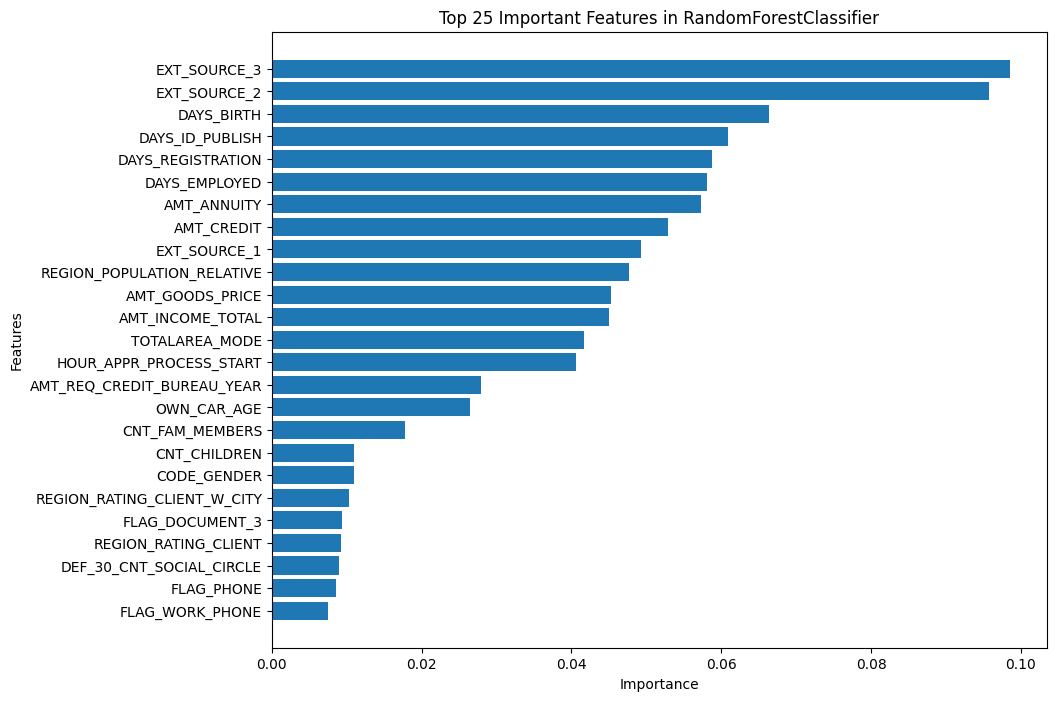

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
mlflow.autolog()



best_score = 0
best_model = None
best_model_name = ""

for model_name, params in classifiers_params.items():
    with mlflow.start_run(run_name=model_name):
        pipeline = ImbPipeline([
            ('resampling', SMOTE()),
            ('classifier', None)
        ])

        clf = GridSearchCV(pipeline, params, cv=3, scoring=roc_auc_scorer, n_jobs=-1)
        clf.fit(X_train, y_train)

        # Log parameters and metrics
        mlflow.log_params(clf.best_params_)
        mlflow.log_metric("best_roc_auc_score", clf.best_score_)

        # Log the model
        mlflow.sklearn.log_model(clf.best_estimator_, "model")

        print(f"Meilleurs paramètres pour {model_name}: {clf.best_params_}")
        print(f"Meilleur score ROC AUC pour {model_name}: {clf.best_score_}")

        # Check if this model is the best so far
        if clf.best_score_ > best_score:
            best_score = clf.best_score_
            best_model = clf.best_estimator_
            best_model_name = model_name

# Plotting the top 25 features
if best_model and hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    feature_importances = best_model.named_steps['classifier'].feature_importances_
    features = X_train.columns
    feature_importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})

    # Select top 25 features
    top_features = feature_importance_df.nlargest(25, "importance").sort_values("importance", ascending=False)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.barh(top_features['feature'], top_features['importance'])
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title(f'Top 25 Important Features in {best_model_name}')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
    plt.show()
else:
    print("Best model does not support feature importance or no best model identified.")


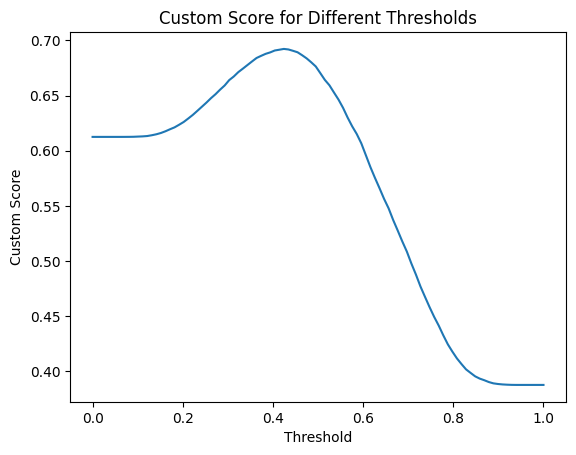

Best threshold: 0.42424242424242425


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, make_scorer

# Define your custom scoring function
def bank_score(y_true, y_pred, fn_value=-4, fp_value=-.5, tp_value= 5,tn_value=0):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    Gain_tot = tp*tp_value + tn*tn_value + fp*fp_value + fn*fn_value
    G_max = (fp + tn)*tn_value + (fn + tp)*tp_value
    G_min = (fp + tn)*fp_value + (fn + tp)*fn_value
    G_normalized = (Gain_tot - G_min) / (G_max - G_min) if (G_max - G_min) != 0 else 0
    return G_normalized

# Predict probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:, 1]

# Initialize lists to store thresholds and scores
thresholds = np.linspace(0, 1, 100)
scores = []

# Calculate the score for each threshold
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    score = bank_score(y_test, y_pred)
    scores.append(score)

# Plot the results
plt.plot(thresholds, scores)
plt.xlabel('Threshold')
plt.ylabel('Custom Score')
plt.title('Custom Score for Different Thresholds')
plt.show()

# Find the threshold with the best score
best_threshold = thresholds[np.argmax(scores)]
print("Best threshold:", best_threshold)


In [10]:
from joblib import dump,load

 
dump(best_model, 'meilleur_modele.pkl')

NameError: name 'best_model' is not defined

In [7]:
modele = load('meilleur_modele.joblib')

NameError: name 'load' is not defined

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# import any other classifiers you want to compare

# Define your classifiers
classifiers = {
    'LightGBM': LGBMClassifier(),
    
    'XGBoost': XGBClassifier(),
    #"CatBoost" :CatBoostClassifier(iterations = 1000, verbose = 0),
    "RandomForest": RandomForestClassifier(n_estimators=1000)
}
 
# Assuming X_train and y_train are already defined
results = []

for name, clf in classifiers.items():
    cv_results = cross_validate(clf, X_train, y_train, cv=5,
                                scoring=[ 'roc_auc'],
                                return_train_score=True, n_jobs=-1)

    results.append({
        'Classifier': name,
      
        'Mean ROC AUC': cv_results['test_roc_auc'].mean(),
        'Mean Fit Time': cv_results['fit_time'].mean(),
        'Mean Score Time': cv_results['score_time'].mean(),
    })

results_df = pd.DataFrame(results)
# Visualization
 

# ROC AUC Comparison
plt.figure(figsize=(10, 6))
results_df.sort_values(by='Mean ROC AUC', ascending=False).plot(x='Classifier', y='Mean ROC AUC', kind='bar', legend=False)
plt.title('Classifier ROC AUC Comparison')
plt.ylabel('Mean ROC AUC')
plt.xticks(rotation=45)
plt.show()

# Fit Time Comparison
plt.figure(figsize=(10, 6))
results_df.sort_values(by='Mean Fit Time').plot(x='Classifier', y='Mean Fit Time', kind='bar', legend=False)
plt.title('Classifier Training Time Comparison')
plt.ylabel('Mean Fit Time (s)')
plt.xticks(rotation=45)
plt.show()

# Score Time Comparison
plt.figure(figsize=(10, 6))
results_df.sort_values(by='Mean Score Time').plot(x='Classifier', y='Mean Score Time', kind='bar', legend=False)
plt.title('Classifier Prediction Time Comparison')
plt.ylabel('Mean Score Time (s)')
plt.xticks(rotation=45)
plt.show()


NameError: name 'X_train' is not defined

In [44]:
results_df

,Classifier,Mean ROC AUC,Mean Fit Time,Mean Score Time
0,LightGBM,0.723004,1.089795,0.025433
1,XGBoost,0.696679,1.725356,0.028081
2,RandomForest,0.703809,146.220622,1.449326


In [1]:
import mlflow
logged_model = 'runs:/d7b3076fb9024125a3d8ec8ee82cdb94/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

In [9]:
y_pred_xgb =  xgboost_model.predict(X_test)

NameError: name 'xgboost_model' is not defined

In [58]:
y_prob_xgb = xgboost_model.predict_proba(X_test)

In [62]:
rf_clf = rf_model.fit(X_train,y_train)

2024/03/20 08:09:47 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4042a36117d5465cbb1c437a41c62a0b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


In [63]:
lgbm_clf = lgbm_model.fit(X_train,y_train)

2024/03/20 08:10:25 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f91f91b2ae394a7e96632629dad415dd', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current lightgbm workflow


[LightGBM] [Info] Number of positive: 2482, number of negative: 2482
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3052
[LightGBM] [Info] Number of data points in the train set: 4964, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [45]:
xgboost_model = load("Xgboost_model.pkl")
rf_model = load("Rf_model.pkl")
lgbm_model= load("LGBM_model.pkl")

In [68]:
features = list(xgboost_model.feature_names_in_) 
len(features)

35

In [83]:
df_test = df_test[features].fillna(0)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER
0,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,-812,...,0,0,0.752614,0.789654,0.159520,0.0392,0.0,1,0.0,F
1,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,-1623,...,0,0,0.564990,0.291656,0.432962,0.0000,0.0,1,3.0,M
2,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,-3503,...,0,0,0.000000,0.699787,0.610991,0.0000,0.0,0,4.0,M
3,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,-4208,...,0,0,0.525734,0.509677,0.612704,0.3700,0.0,1,3.0,F
4,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,-4262,...,1,1,0.202145,0.425687,0.000000,0.0000,0.0,1,0.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970,-5169,-9094.0,-3399,...,0,0,0.000000,0.648575,0.643026,0.0000,0.0,0,1.0,F
48740,2,157500.0,622413.0,31909.5,495000.0,0.035792,-11186,-1149,-3015.0,-3003,...,1,1,0.000000,0.684596,0.000000,0.0000,0.0,1,0.0,F
48741,1,202500.0,315000.0,33205.5,315000.0,0.026392,-15922,-3037,-2681.0,-1504,...,0,0,0.733503,0.632770,0.283712,0.1663,0.0,1,1.0,F
48742,0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968,-2731,-1461.0,-1364,...,1,1,0.373090,0.445701,0.595456,0.1974,0.0,1,2.0,M


In [88]:
df_test["CODE_GENDER"] = df_test["CODE_GENDER"].map({"M": 0, "F": 1})


In [89]:
df_test.CODE_GENDER

0        1
1        0
2        0
3        1
4        0
        ..
48739    1
48740    1
48741    1
48742    0
48743    1
Name: CODE_GENDER, Length: 48744, dtype: int64

In [91]:
df_test.to_csv("df_test_preproced",index=False)

In [104]:
predictions = xgb_clf.predict(df_test)

In [98]:
xgb_clf.predict_proba(df_test)[:,1]

array([0.25916755, 0.00111939, 0.00137148, ..., 0.4757051 , 0.15371688,
       0.9996786 ], dtype=float32)

In [105]:
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [107]:
df_test["predictions"] = predictions

In [108]:
df_test

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER,predictions
0,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,-812,...,0,0.752614,0.789654,0.159520,0.0392,0.0,1,0.0,1,0
1,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,-1623,...,0,0.564990,0.291656,0.432962,0.0000,0.0,1,3.0,0,0
2,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,-3503,...,0,0.000000,0.699787,0.610991,0.0000,0.0,0,4.0,0,0
3,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,-4208,...,0,0.525734,0.509677,0.612704,0.3700,0.0,1,3.0,1,0
4,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,-4262,...,1,0.202145,0.425687,0.000000,0.0000,0.0,1,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970,-5169,-9094.0,-3399,...,0,0.000000,0.648575,0.643026,0.0000,0.0,0,1.0,1,0
48740,2,157500.0,622413.0,31909.5,495000.0,0.035792,-11186,-1149,-3015.0,-3003,...,1,0.000000,0.684596,0.000000,0.0000,0.0,1,0.0,1,1
48741,1,202500.0,315000.0,33205.5,315000.0,0.026392,-15922,-3037,-2681.0,-1504,...,0,0.733503,0.632770,0.283712,0.1663,0.0,1,1.0,1,0
48742,0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968,-2731,-1461.0,-1364,...,1,0.373090,0.445701,0.595456,0.1974,0.0,1,2.0,0,0


In [5]:
import shap
# Creation explicateur SHAP ET CALCUL DES VALEURS SHAP
explainer = shap.Explainer(xgb_clf)
shap_values = explainer(X_test)
# Shap summary Plot pour une interpretation globale
shap.summary_plot(shap_values, X_test)
# shap waterfall plot pour une interpretation local d"une instance spécifique
shap.plots.waterfall(shap_values[0])


NameError: name 'xgb_clf' is not defined